<a href="https://colab.research.google.com/github/avtar123/Machine-Failure/blob/main/Machine_Failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [100]:
train=pd.read_csv('/content/drive/MyDrive/machine_failures_data/train.csv')
test =pd.read_csv('/content/drive/MyDrive/machine_failures_data/test.csv')

In [101]:
train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
train.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<ipython-input-103-f8bd2ae9216f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(train.corr(), center=0, cmap='BrBG', annot=True)


<Axes: >

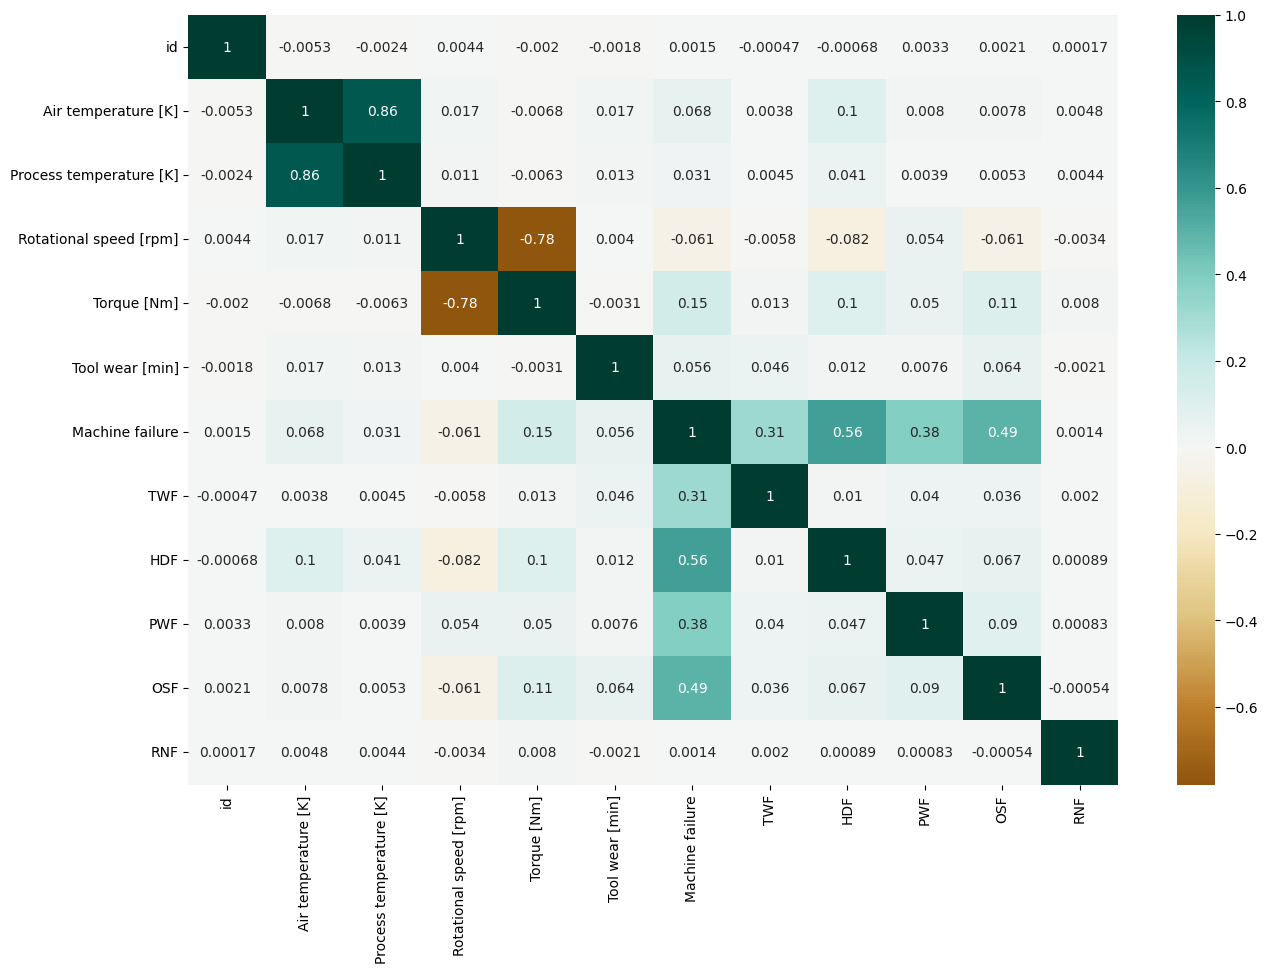

In [103]:
fig, ax = plt.subplots(figsize=(15,10))
heatmap=sns.heatmap(train.corr(), center=0, cmap='BrBG', annot=True)
heatmap

In [104]:
train_d=copy.deepcopy(train)

In [105]:
test_d=copy.deepcopy(test)

In [106]:
li=['id','Process temperature [K]']

In [107]:
train_d.drop(li,axis=1,inplace=True)

In [108]:
test_d.drop(li,axis=1,inplace=True)

In [109]:
train_d

,Product ID,Type,Air temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M22284,M,300.1,1530,37.5,210,0,0,0,0,0,0
136425,H38017,H,297.5,1447,49.1,2,0,0,0,0,0,0
136426,L54690,L,300.5,1524,38.5,214,0,0,0,0,0,0
136427,L53876,L,301.7,1447,46.3,42,0,0,0,0,0,0


In [110]:
# Find unique IDs
unique_ids = train_d['Product ID'].unique()
count=0
# Print the unique IDs
for id in unique_ids:
    count=count+1
print(count)

9976


In [111]:
string_object=[]
for idx,i in enumerate(train_d.dtypes):
  if i == 'object':
    string_object.append(train_d.columns[idx])

In [112]:
string_object_t=[]
for idx,i in enumerate(test_d.dtypes):
  if i == 'object':
    string_object_t.append(test_d.columns[idx])

In [113]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj in string_object:
  print(str_obj)
  train_d[str_obj]= label_encoder.fit_transform(train_d[str_obj])

Product ID
Type


In [114]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj in string_object:
  print(str_obj)
  test_d[str_obj]= label_encoder.fit_transform(test_d[str_obj])

Product ID
Type


In [115]:
train_random=copy.deepcopy(train_d)

In [116]:
train_random.drop(train_random.columns[6],axis=1,inplace=True)

In [117]:
X=train_random

In [118]:
X

,Product ID,Type,Air temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,2752,1,300.6,1596,36.1,140,0,0,0,0,0
1,8620,2,302.6,1759,29.1,200,0,0,0,0,0
2,2344,1,299.3,1805,26.5,25,0,0,0,0,0
3,4704,1,301.0,1524,44.3,197,0,0,0,0,0
4,9727,2,298.0,1641,35.4,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
136424,9220,2,300.1,1530,37.5,210,0,0,0,0,0
136425,838,0,297.5,1447,49.1,2,0,0,0,0,0
136426,5502,1,300.5,1524,38.5,214,0,0,0,0,0
136427,5024,1,301.7,1447,46.3,42,0,0,0,0,0


In [119]:
y=train_d.iloc[:,6:7]
y

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
136424,0
136425,0
136426,0
136427,0


# **RandomForest**

In [42]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [122]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor object
rf_regressor = RandomForestRegressor(max_depth=10,n_estimators=1000)

# Train the Random Forest model
rf_regressor.fit(X_train, y_train)

<ipython-input-122-f9d3bd779064>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=1000)

In [113]:
rf_regressor.score(X_test,y_test)

0.7630073607770829

In [115]:
y_train

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0
...,...
110268,0
119879,0
103694,0
131932,0


# **XGBoost**

In [30]:
from xgboost import XGBClassifier

In [31]:
train_XG=copy.deepcopy(train_d)

In [32]:
train_XG

,Product ID,Type,Air temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2752,1,300.6,1596,36.1,140,0,0,0,0,0,0
1,8620,2,302.6,1759,29.1,200,0,0,0,0,0,0
2,2344,1,299.3,1805,26.5,25,0,0,0,0,0,0
3,4704,1,301.0,1524,44.3,197,0,0,0,0,0,0
4,9727,2,298.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,9220,2,300.1,1530,37.5,210,0,0,0,0,0,0
136425,838,0,297.5,1447,49.1,2,0,0,0,0,0,0
136426,5502,1,300.5,1524,38.5,214,0,0,0,0,0,0
136427,5024,1,301.7,1447,46.3,42,0,0,0,0,0,0


In [33]:
feature_names = train_XG.columns
# Example list of feature names
# Convert the list to a string without the restricted characters
feature_names_string = ', '.join(feature_names).replace('[', '').replace(']', '').replace('<', '').split(",")

# Pass the feature_names_string as the parameter value
train_XG.columns = feature_names_string

In [72]:
feature_names_t = test_d.columns
# Example list of feature names
# Convert the list to a string without the restricted characters
feature_names_string_t = ', '.join(feature_names_t).replace('[', '').replace(']', '').replace('<', '').split(",")

# Pass the feature_names_string as the parameter value
test_d.columns = feature_names_string_t

In [36]:
train_XG

,Product ID,Type,Air temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,HDF,PWF,OSF,RNF
0,2752,1,300.6,1596,36.1,140,0,0,0,0,0,0
1,8620,2,302.6,1759,29.1,200,0,0,0,0,0,0
2,2344,1,299.3,1805,26.5,25,0,0,0,0,0,0
3,4704,1,301.0,1524,44.3,197,0,0,0,0,0,0
4,9727,2,298.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,9220,2,300.1,1530,37.5,210,0,0,0,0,0,0
136425,838,0,297.5,1447,49.1,2,0,0,0,0,0,0
136426,5502,1,300.5,1524,38.5,214,0,0,0,0,0,0
136427,5024,1,301.7,1447,46.3,42,0,0,0,0,0,0


In [37]:
y_XG=train_XG.iloc[:,6:7]
y_XG

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
136424,0
136425,0
136426,0
136427,0


In [38]:
X_XG=train_XG.drop(train_XG.columns[6],axis=1,inplace=True)
#train_random.drop(train_random.columns[6],axis=1,inplace=True)

In [40]:
train_XG

,Product ID,Type,Air temperature K,Rotational speed rpm,Torque Nm,Tool wear min,TWF,HDF,PWF,OSF,RNF
0,2752,1,300.6,1596,36.1,140,0,0,0,0,0
1,8620,2,302.6,1759,29.1,200,0,0,0,0,0
2,2344,1,299.3,1805,26.5,25,0,0,0,0,0
3,4704,1,301.0,1524,44.3,197,0,0,0,0,0
4,9727,2,298.0,1641,35.4,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
136424,9220,2,300.1,1530,37.5,210,0,0,0,0,0
136425,838,0,297.5,1447,49.1,2,0,0,0,0,0
136426,5502,1,300.5,1524,38.5,214,0,0,0,0,0
136427,5024,1,301.7,1447,46.3,42,0,0,0,0,0


In [121]:
# Split the data into training and testing sets
X_trainXG, X_testXG, y_trainXG, y_testXG = train_test_split(train_XG, y_XG, test_size=0.2, random_state=10)

In [88]:
xgb = XGBClassifier(max_depth = 8)
xgb.fit(X_trainXG, y_trainXG)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [85]:
xgb.score(X_testXG,y_testXG)

0.9957487356153338

In [86]:
xgb.score(X_testXG,y_testXG)

0.9957487356153338

In [87]:
xgb.score(X_trainXG,y_trainXG)

0.9997526181248454

# **Save CSV**

In [78]:
test

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [79]:
test_d

,Product ID,Type,Air temperature K,Rotational speed rpm,Torque Nm,Tool wear min,TWF,HDF,PWF,OSF,RNF
0,3203,1,302.3,1499,38.0,60,0,0,0,0,0
1,4986,1,301.7,1713,28.8,17,0,0,0,0,0
2,2958,1,301.3,1525,37.7,96,0,0,0,0,0
3,8828,2,300.1,1479,47.6,5,0,0,0,0,0
4,8368,2,303.4,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
90949,3332,1,302.3,1484,40.4,15,0,0,0,0,0
90950,1347,1,297.9,1542,33.8,31,0,0,0,0,0
90951,1533,1,295.6,1501,41.4,187,0,0,0,0,0
90952,2040,1,298.1,1534,40.3,69,0,0,0,0,0


In [82]:
y_test_XG=xgb.predict(test_d)

In [83]:
data_save = pd.DataFrame({"id":test['id'],"Machine failure":y_test_XG})
data_save.to_csv("MachineFailure_XGB1.csv",index=False)

# **CatBoost**

In [89]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.6 MB/s eta 0:00:00


In [91]:
import catboost as cb
from sklearn.metrics import accuracy_score

In [ ]:
feature_names = ['Product ID','Type',
                 'Air temperature [K]',
                 'Rotational speed [rpm]','Torque [Nm]',
                 'Tool wear [min]','TWF','HDF',
                 'PWF','OSF','RNF']

In [ ]:
# params ={'loss_function': 'Logloss',
#          'eval_metric': 'AUC',
#          'random_seed': 19970507,
#          'learning_rate': 0.027,
#           'iterations': 927,
#           'depth': 5,
#           'subsample': 0.705}

In [158]:
cat_feature=['Product ID', 'Type'] # List of categorical feature indices
model = cb.CatBoostClassifier(iterations=1000, loss_function='Logloss', learning_rate=0.1, depth=6, random_state=42,cat_features=cat_feature)


In [159]:
mo_cat=model.fit(X_train, y_train)
#model.fit(train_pool, eval_set=train_pool,verbose=False, plot=True )

0:	learn: 0.4673031	total: 110ms	remaining: 1m 49s
1:	learn: 0.3098151	total: 221ms	remaining: 1m 50s
2:	learn: 0.2103919	total: 323ms	remaining: 1m 47s
3:	learn: 0.1438789	total: 431ms	remaining: 1m 47s
4:	learn: 0.1053414	total: 532ms	remaining: 1m 45s
5:	learn: 0.0824857	total: 632ms	remaining: 1m 44s
6:	learn: 0.0651559	total: 756ms	remaining: 1m 47s
7:	learn: 0.0543590	total: 882ms	remaining: 1m 49s
8:	learn: 0.0463741	total: 979ms	remaining: 1m 47s
9:	learn: 0.0402874	total: 1.08s	remaining: 1m 47s
10:	learn: 0.0360354	total: 1.19s	remaining: 1m 46s
11:	learn: 0.0335180	total: 1.28s	remaining: 1m 45s
12:	learn: 0.0312097	total: 1.38s	remaining: 1m 44s
13:	learn: 0.0290404	total: 1.49s	remaining: 1m 45s
14:	learn: 0.0273234	total: 1.6s	remaining: 1m 45s
15:	learn: 0.0261420	total: 1.74s	remaining: 1m 46s
16:	learn: 0.0253572	total: 1.87s	remaining: 1m 47s
17:	learn: 0.0246109	total: 1.99s	remaining: 1m 48s
18:	learn: 0.0241240	total: 2.1s	remaining: 1m 48s
19:	learn: 0.0233499	tot

In [154]:
model.score(X_test,y_test)

0.9961152239243568

In [155]:
model.score(X_train,y_train)

0.9969764437481102

In [156]:
y_pred_cat = model.predict(test_d)

In [157]:
data_save = pd.DataFrame({"id":test['id'],"Machine failure":y_pred_cat})
data_save.to_csv("MachineFailure_cat1.csv",index=False)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_cat)
print("Accuracy:", accuracy)